In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import sys
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
test = pd.read_csv("/home/sir/Documents/mercedes/test.csv") # test has no y value, y comes from train split
train = pd.read_csv("/home/sir/Documents/mercedes/train.csv")

uniq = {}
#dummyvariables
for colname in ['X0', 'X1', 'X2','X3','X4','X5','X6','X8']:
    uniq[colname] = train[colname].unique()
for colname in ['X0', 'X1', 'X2','X3','X4','X5','X6','X8']:
    train[colname] = train[colname].apply(lambda x: np.where(uniq[colname] == x)[0][0])

In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,1,1,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,1,2,2,2,0,2,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,1,1,2,3,0,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,1,0,2,3,0,3,2,3,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.asarray(train)
X,y = data[:, 2:], data[:, 1]
lr = LinearRegression()
lr.fit(X, y)
lr.coef_ # which factors are most importante
lr.intercept_
lr.score(X,y)

0.59196992348988053

In [28]:
data = np.asarray(train)
X,y = data[:, 2:], data[:, 1]
lr = LassoLars(alpha=0.01)
lr.fit(X, y)
lr.coef_ # which factors are most importante
lr.intercept_
lr.score(X,y)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=4.682e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.706e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=2.706e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_m

0.54101214531137609

In [3]:
data = np.asarray(train)
X,y = data[:, 2:], data[:, 1]


In [29]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = GradientBoostingRegressor(**params)
gbr.fit(X,y)
gbr.score(X,y)


0.62448863253826614

In [7]:
import xgboost as xgb

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import sys
print("My shit: regression")
kf = KFold(n_splits=10, shuffle=True)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    sys.stdout.write('\r' + str(r2_score(actuals, predictions)))
    sys.stdout.flush()

My shit: regression
0.584974938306

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
from keras import backend as K

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

#Red data from csv file for training and validation data
X_train, y_train, X_test, y_test = X[:int(len(X)*.8)], y[:int(len(y)*.8)], X[int(len(X)*.8):], y[int(len(y)*.8):]



# create model
model = Sequential()
model.add(Dense(20, activation="selu", kernel_initializer="uniform", input_shape=(376,)))
model.add(Dense(1, activation="linear", kernel_initializer="uniform"))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=[r2_keras])

# Fit the model
history = model.fit(X_train, y_train, epochs=7000, batch_size=10,  verbose=2)

# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict(X_test)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")
                                                    


Epoch 1/7000
0s - loss: 4238.5198 - r2_keras: -3.8474e+01
Epoch 2/7000
0s - loss: 268.4146 - r2_keras: -1.1528e+00
Epoch 3/7000
0s - loss: 232.1082 - r2_keras: -8.0057e-01
Epoch 4/7000
0s - loss: 199.8938 - r2_keras: -5.7703e-01
Epoch 5/7000
0s - loss: 172.3459 - r2_keras: -2.5604e-01
Epoch 6/7000
0s - loss: 150.1775 - r2_keras: -1.2620e-01
Epoch 7/7000
0s - loss: 132.5885 - r2_keras: 0.0705
Epoch 8/7000
0s - loss: 119.0919 - r2_keras: 0.1709
Epoch 9/7000
0s - loss: 109.3057 - r2_keras: 0.2574
Epoch 10/7000
0s - loss: 101.7951 - r2_keras: 0.3563
Epoch 11/7000
0s - loss: 96.3079 - r2_keras: 0.3836
Epoch 12/7000
0s - loss: 92.4394 - r2_keras: 0.4142
Epoch 13/7000
0s - loss: 89.6958 - r2_keras: 0.4349
Epoch 14/7000
0s - loss: 87.6130 - r2_keras: 0.4572
Epoch 15/7000
0s - loss: 86.0373 - r2_keras: 0.4491
Epoch 16/7000
0s - loss: 84.4264 - r2_keras: 0.4795
Epoch 17/7000
0s - loss: 83.9136 - r2_keras: 0.4813
Epoch 18/7000
0s - loss: 82.2320 - r2_keras: 0.4879
Epoch 19/7000
0s - loss: 81.5942

0s - loss: 52.6847 - r2_keras: 0.6548
Epoch 158/7000
0s - loss: 52.7967 - r2_keras: 0.6544
Epoch 159/7000
0s - loss: 52.7489 - r2_keras: 0.6373
Epoch 160/7000
0s - loss: 52.9264 - r2_keras: 0.6556
Epoch 161/7000
0s - loss: 52.5231 - r2_keras: 0.6608
Epoch 162/7000
0s - loss: 52.6758 - r2_keras: 0.6428
Epoch 163/7000
0s - loss: 52.4788 - r2_keras: 0.6503
Epoch 164/7000
0s - loss: 52.5395 - r2_keras: 0.6700
Epoch 165/7000
0s - loss: 52.5496 - r2_keras: 0.6569
Epoch 166/7000
0s - loss: 51.8696 - r2_keras: 0.6652
Epoch 167/7000
0s - loss: 52.0337 - r2_keras: 0.6646
Epoch 168/7000
0s - loss: 52.3357 - r2_keras: 0.6517
Epoch 169/7000
0s - loss: 51.9213 - r2_keras: 0.6516
Epoch 170/7000
0s - loss: 51.7869 - r2_keras: 0.6622
Epoch 171/7000
0s - loss: 52.1853 - r2_keras: 0.6596
Epoch 172/7000
0s - loss: 51.3855 - r2_keras: 0.6711
Epoch 173/7000
0s - loss: 51.0831 - r2_keras: 0.6579
Epoch 174/7000
0s - loss: 51.4806 - r2_keras: 0.6700
Epoch 175/7000
0s - loss: 50.9373 - r2_keras: 0.6616
Epoch 17

0s - loss: 43.7296 - r2_keras: 0.7156
Epoch 313/7000
0s - loss: 43.1401 - r2_keras: 0.7137
Epoch 314/7000
0s - loss: 43.6487 - r2_keras: 0.7119
Epoch 315/7000
0s - loss: 43.2191 - r2_keras: 0.7126
Epoch 316/7000
0s - loss: 43.3803 - r2_keras: 0.7131
Epoch 317/7000
0s - loss: 43.2869 - r2_keras: 0.7029
Epoch 318/7000
0s - loss: 44.1566 - r2_keras: 0.7092
Epoch 319/7000
0s - loss: 43.8980 - r2_keras: 0.6977
Epoch 320/7000
0s - loss: 42.9787 - r2_keras: 0.7085
Epoch 321/7000
0s - loss: 43.6540 - r2_keras: 0.7061
Epoch 322/7000
0s - loss: 43.0682 - r2_keras: 0.7100
Epoch 323/7000
0s - loss: 43.5542 - r2_keras: 0.7085
Epoch 324/7000
0s - loss: 43.3622 - r2_keras: 0.7070
Epoch 325/7000
0s - loss: 43.4566 - r2_keras: 0.6911
Epoch 326/7000
0s - loss: 43.3834 - r2_keras: 0.6764
Epoch 327/7000
0s - loss: 43.3850 - r2_keras: 0.6984
Epoch 328/7000
0s - loss: 42.8299 - r2_keras: 0.7104
Epoch 329/7000
0s - loss: 43.2913 - r2_keras: 0.7029
Epoch 330/7000
0s - loss: 42.8967 - r2_keras: 0.7072
Epoch 33

0s - loss: 40.1660 - r2_keras: 0.7269
Epoch 468/7000
0s - loss: 39.6448 - r2_keras: 0.7106
Epoch 469/7000
0s - loss: 39.1202 - r2_keras: 0.7082
Epoch 470/7000
0s - loss: 39.3357 - r2_keras: 0.7298
Epoch 471/7000
0s - loss: 38.9469 - r2_keras: 0.7388
Epoch 472/7000
0s - loss: 39.2684 - r2_keras: 0.7289
Epoch 473/7000
0s - loss: 39.0231 - r2_keras: 0.7359
Epoch 474/7000
0s - loss: 39.4938 - r2_keras: 0.7184
Epoch 475/7000
0s - loss: 39.4750 - r2_keras: 0.7218
Epoch 476/7000
0s - loss: 38.6352 - r2_keras: 0.7333
Epoch 477/7000
0s - loss: 39.2221 - r2_keras: 0.7197
Epoch 478/7000
0s - loss: 39.0287 - r2_keras: 0.7211
Epoch 479/7000
0s - loss: 39.5801 - r2_keras: 0.7138
Epoch 480/7000
0s - loss: 39.3373 - r2_keras: 0.7250
Epoch 481/7000
0s - loss: 39.0392 - r2_keras: 0.7337
Epoch 482/7000
0s - loss: 38.9039 - r2_keras: 0.7355
Epoch 483/7000
0s - loss: 39.0804 - r2_keras: 0.7242
Epoch 484/7000
0s - loss: 39.1357 - r2_keras: 0.7277
Epoch 485/7000
0s - loss: 39.3605 - r2_keras: 0.7159
Epoch 48

0s - loss: 36.8379 - r2_keras: 0.7372
Epoch 623/7000
0s - loss: 37.3646 - r2_keras: 0.7316
Epoch 624/7000
0s - loss: 37.1373 - r2_keras: 0.7417
Epoch 625/7000
0s - loss: 37.1571 - r2_keras: 0.7402
Epoch 626/7000
0s - loss: 36.8539 - r2_keras: 0.7363
Epoch 627/7000
0s - loss: 37.3198 - r2_keras: 0.7338
Epoch 628/7000
0s - loss: 36.6899 - r2_keras: 0.7346
Epoch 629/7000
0s - loss: 38.1143 - r2_keras: 0.7344
Epoch 630/7000
0s - loss: 36.6406 - r2_keras: 0.7413
Epoch 631/7000
0s - loss: 36.2555 - r2_keras: 0.7490
Epoch 632/7000
0s - loss: 36.6894 - r2_keras: 0.7361
Epoch 633/7000
0s - loss: 37.0316 - r2_keras: 0.7436
Epoch 634/7000
0s - loss: 36.7677 - r2_keras: 0.7369
Epoch 635/7000
0s - loss: 37.4539 - r2_keras: 0.7289
Epoch 636/7000
0s - loss: 36.8332 - r2_keras: 0.7322
Epoch 637/7000
0s - loss: 36.6766 - r2_keras: 0.7347
Epoch 638/7000
0s - loss: 37.5597 - r2_keras: 0.7332
Epoch 639/7000
0s - loss: 36.6449 - r2_keras: 0.7426
Epoch 640/7000
0s - loss: 36.6960 - r2_keras: 0.7401
Epoch 64

0s - loss: 35.5111 - r2_keras: 0.7488
Epoch 778/7000
0s - loss: 35.5614 - r2_keras: 0.7427
Epoch 779/7000
0s - loss: 35.6550 - r2_keras: 0.7459
Epoch 780/7000
0s - loss: 35.3695 - r2_keras: 0.7366
Epoch 781/7000
0s - loss: 35.4053 - r2_keras: 0.7480
Epoch 782/7000
0s - loss: 35.3471 - r2_keras: 0.7549
Epoch 783/7000
0s - loss: 36.0136 - r2_keras: 0.7362
Epoch 784/7000
0s - loss: 35.6019 - r2_keras: 0.7440
Epoch 785/7000
0s - loss: 35.5412 - r2_keras: 0.7335
Epoch 786/7000
0s - loss: 35.4413 - r2_keras: 0.7429
Epoch 787/7000
0s - loss: 35.4108 - r2_keras: 0.7402
Epoch 788/7000
0s - loss: 35.4435 - r2_keras: 0.7549
Epoch 789/7000
0s - loss: 35.3283 - r2_keras: 0.7536
Epoch 790/7000
0s - loss: 35.3428 - r2_keras: 0.7367
Epoch 791/7000
0s - loss: 35.8118 - r2_keras: 0.7414
Epoch 792/7000
0s - loss: 35.4890 - r2_keras: 0.7468
Epoch 793/7000
0s - loss: 35.9244 - r2_keras: 0.7451
Epoch 794/7000
0s - loss: 35.3246 - r2_keras: 0.7538
Epoch 795/7000
0s - loss: 35.8528 - r2_keras: 0.7499
Epoch 79

0s - loss: 34.5039 - r2_keras: 0.7488
Epoch 933/7000
0s - loss: 34.7499 - r2_keras: 0.7446
Epoch 934/7000
0s - loss: 35.0114 - r2_keras: 0.7384
Epoch 935/7000
0s - loss: 34.4968 - r2_keras: 0.7580
Epoch 936/7000
0s - loss: 34.3718 - r2_keras: 0.7557
Epoch 937/7000
0s - loss: 34.5713 - r2_keras: 0.7507
Epoch 938/7000
0s - loss: 34.8231 - r2_keras: 0.7477
Epoch 939/7000
0s - loss: 34.7574 - r2_keras: 0.7451
Epoch 940/7000
0s - loss: 34.1712 - r2_keras: 0.7599
Epoch 941/7000
0s - loss: 34.3352 - r2_keras: 0.7541
Epoch 942/7000
0s - loss: 34.9194 - r2_keras: 0.7464
Epoch 943/7000
0s - loss: 34.4443 - r2_keras: 0.7450
Epoch 944/7000
0s - loss: 34.4557 - r2_keras: 0.7510
Epoch 945/7000
0s - loss: 34.6070 - r2_keras: 0.7493
Epoch 946/7000
0s - loss: 34.3421 - r2_keras: 0.7622
Epoch 947/7000
0s - loss: 34.9113 - r2_keras: 0.7297
Epoch 948/7000
0s - loss: 34.2759 - r2_keras: 0.7486
Epoch 949/7000
0s - loss: 34.7500 - r2_keras: 0.7295
Epoch 950/7000
0s - loss: 34.6584 - r2_keras: 0.7423
Epoch 95

0s - loss: 34.8868 - r2_keras: 0.7313
Epoch 1086/7000
0s - loss: 33.7493 - r2_keras: 0.7549
Epoch 1087/7000
0s - loss: 33.5186 - r2_keras: 0.7495
Epoch 1088/7000
0s - loss: 33.7764 - r2_keras: 0.7552
Epoch 1089/7000
0s - loss: 33.8444 - r2_keras: 0.7505
Epoch 1090/7000
0s - loss: 33.7424 - r2_keras: 0.7542
Epoch 1091/7000
0s - loss: 33.9079 - r2_keras: 0.7578
Epoch 1092/7000
0s - loss: 33.8156 - r2_keras: 0.7461
Epoch 1093/7000
0s - loss: 33.7579 - r2_keras: 0.6974
Epoch 1094/7000
0s - loss: 34.1269 - r2_keras: 0.7448
Epoch 1095/7000
0s - loss: 33.9029 - r2_keras: 0.7487
Epoch 1096/7000
0s - loss: 33.8968 - r2_keras: 0.7333
Epoch 1097/7000
0s - loss: 33.8246 - r2_keras: 0.7487
Epoch 1098/7000
0s - loss: 33.9856 - r2_keras: 0.7468
Epoch 1099/7000
0s - loss: 34.0683 - r2_keras: 0.7592
Epoch 1100/7000
0s - loss: 33.5046 - r2_keras: 0.7672
Epoch 1101/7000
0s - loss: 33.4655 - r2_keras: 0.7488
Epoch 1102/7000
0s - loss: 33.4698 - r2_keras: 0.7611
Epoch 1103/7000
0s - loss: 33.8110 - r2_kera

0s - loss: 33.0698 - r2_keras: 0.7564
Epoch 1238/7000
0s - loss: 32.9771 - r2_keras: 0.7569
Epoch 1239/7000
0s - loss: 33.4205 - r2_keras: 0.7633
Epoch 1240/7000
0s - loss: 33.0886 - r2_keras: 0.7592
Epoch 1241/7000
0s - loss: 33.2531 - r2_keras: 0.7565
Epoch 1242/7000
0s - loss: 33.4189 - r2_keras: 0.7490
Epoch 1243/7000
0s - loss: 33.0405 - r2_keras: 0.7690
Epoch 1244/7000
0s - loss: 33.3748 - r2_keras: 0.7554
Epoch 1245/7000
0s - loss: 33.0311 - r2_keras: 0.7609
Epoch 1246/7000
0s - loss: 33.1026 - r2_keras: 0.7615
Epoch 1247/7000
0s - loss: 33.0719 - r2_keras: 0.7598
Epoch 1248/7000
0s - loss: 32.9777 - r2_keras: 0.7635
Epoch 1249/7000
0s - loss: 32.9113 - r2_keras: 0.7579
Epoch 1250/7000
0s - loss: 33.3341 - r2_keras: 0.7470
Epoch 1251/7000
0s - loss: 33.1650 - r2_keras: 0.7528
Epoch 1252/7000
0s - loss: 33.2524 - r2_keras: 0.7517
Epoch 1253/7000
0s - loss: 33.5167 - r2_keras: 0.7591
Epoch 1254/7000
0s - loss: 33.2051 - r2_keras: 0.7628
Epoch 1255/7000
0s - loss: 33.2729 - r2_kera

0s - loss: 32.6025 - r2_keras: 0.7590
Epoch 1390/7000
0s - loss: 32.7424 - r2_keras: 0.7510
Epoch 1391/7000
0s - loss: 32.2543 - r2_keras: 0.7573
Epoch 1392/7000
0s - loss: 32.5117 - r2_keras: 0.7514
Epoch 1393/7000
0s - loss: 32.3282 - r2_keras: 0.7646
Epoch 1394/7000
0s - loss: 32.4966 - r2_keras: 0.7619
Epoch 1395/7000
0s - loss: 32.7392 - r2_keras: 0.7598
Epoch 1396/7000
0s - loss: 32.2385 - r2_keras: 0.7615
Epoch 1397/7000
0s - loss: 32.2525 - r2_keras: 0.7646
Epoch 1398/7000
0s - loss: 32.0216 - r2_keras: 0.7705
Epoch 1399/7000
0s - loss: 32.4877 - r2_keras: 0.7548
Epoch 1400/7000
0s - loss: 32.1479 - r2_keras: 0.7721
Epoch 1401/7000
0s - loss: 32.3577 - r2_keras: 0.7602
Epoch 1402/7000
0s - loss: 32.5119 - r2_keras: 0.7598
Epoch 1403/7000
0s - loss: 32.6471 - r2_keras: 0.7583
Epoch 1404/7000
0s - loss: 32.6609 - r2_keras: 0.7571
Epoch 1405/7000
0s - loss: 32.2038 - r2_keras: 0.7723
Epoch 1406/7000
0s - loss: 32.3624 - r2_keras: 0.7685
Epoch 1407/7000
0s - loss: 32.6319 - r2_kera

0s - loss: 31.8620 - r2_keras: 0.7657
Epoch 1542/7000
0s - loss: 31.9605 - r2_keras: 0.7596
Epoch 1543/7000
0s - loss: 31.7811 - r2_keras: 0.7671
Epoch 1544/7000
0s - loss: 32.2725 - r2_keras: 0.7593
Epoch 1545/7000
0s - loss: 31.6815 - r2_keras: 0.7711
Epoch 1546/7000
0s - loss: 31.4948 - r2_keras: 0.7642
Epoch 1547/7000
0s - loss: 31.9721 - r2_keras: 0.7575
Epoch 1548/7000
0s - loss: 32.1149 - r2_keras: 0.7622
Epoch 1549/7000
0s - loss: 31.8009 - r2_keras: 0.7525
Epoch 1550/7000
0s - loss: 32.0596 - r2_keras: 0.7667
Epoch 1551/7000
0s - loss: 32.2662 - r2_keras: 0.7524
Epoch 1552/7000
0s - loss: 31.9820 - r2_keras: 0.7529
Epoch 1553/7000
0s - loss: 32.4747 - r2_keras: 0.7524
Epoch 1554/7000
0s - loss: 32.3604 - r2_keras: 0.7593
Epoch 1555/7000
0s - loss: 31.8675 - r2_keras: 0.7662
Epoch 1556/7000
0s - loss: 31.8597 - r2_keras: 0.7696
Epoch 1557/7000
0s - loss: 31.7489 - r2_keras: 0.7659
Epoch 1558/7000
0s - loss: 32.0857 - r2_keras: 0.7634
Epoch 1559/7000
0s - loss: 31.8470 - r2_kera

0s - loss: 31.3348 - r2_keras: 0.7722
Epoch 1694/7000
0s - loss: 31.5966 - r2_keras: 0.7648
Epoch 1695/7000
0s - loss: 31.2650 - r2_keras: 0.7693
Epoch 1696/7000
0s - loss: 31.2170 - r2_keras: 0.7663
Epoch 1697/7000
0s - loss: 31.7670 - r2_keras: 0.7610
Epoch 1698/7000
0s - loss: 31.7685 - r2_keras: 0.7751
Epoch 1699/7000
0s - loss: 32.1175 - r2_keras: 0.7543
Epoch 1700/7000
0s - loss: 31.2296 - r2_keras: 0.7649
Epoch 1701/7000
0s - loss: 31.1861 - r2_keras: 0.7667
Epoch 1702/7000
0s - loss: 31.3943 - r2_keras: 0.7670
Epoch 1703/7000
0s - loss: 31.2858 - r2_keras: 0.7654
Epoch 1704/7000
0s - loss: 31.1230 - r2_keras: 0.7601
Epoch 1705/7000
0s - loss: 31.6160 - r2_keras: 0.7665
Epoch 1706/7000
0s - loss: 31.3824 - r2_keras: 0.7806
Epoch 1707/7000
0s - loss: 31.7596 - r2_keras: 0.7564
Epoch 1708/7000
0s - loss: 31.8900 - r2_keras: 0.7688
Epoch 1709/7000
0s - loss: 31.5022 - r2_keras: 0.7706
Epoch 1710/7000
0s - loss: 31.1412 - r2_keras: 0.7694
Epoch 1711/7000
0s - loss: 31.3240 - r2_kera

0s - loss: 30.9555 - r2_keras: 0.7620
Epoch 1846/7000
0s - loss: 31.2127 - r2_keras: 0.7464
Epoch 1847/7000
0s - loss: 31.0224 - r2_keras: 0.7647
Epoch 1848/7000
0s - loss: 30.8059 - r2_keras: 0.7772
Epoch 1849/7000
0s - loss: 31.1272 - r2_keras: 0.7738
Epoch 1850/7000
0s - loss: 30.8029 - r2_keras: 0.7641
Epoch 1851/7000
0s - loss: 31.1810 - r2_keras: 0.7701
Epoch 1852/7000
0s - loss: 30.9224 - r2_keras: 0.7691
Epoch 1853/7000
0s - loss: 31.0795 - r2_keras: 0.7660
Epoch 1854/7000
0s - loss: 31.1763 - r2_keras: 0.7695
Epoch 1855/7000
0s - loss: 31.3776 - r2_keras: 0.7701
Epoch 1856/7000
0s - loss: 31.0268 - r2_keras: 0.7743
Epoch 1857/7000
0s - loss: 31.1255 - r2_keras: 0.7673
Epoch 1858/7000
0s - loss: 31.1827 - r2_keras: 0.7606
Epoch 1859/7000
0s - loss: 30.8623 - r2_keras: 0.7626
Epoch 1860/7000
0s - loss: 31.1884 - r2_keras: 0.7602
Epoch 1861/7000
0s - loss: 30.7982 - r2_keras: 0.7557
Epoch 1862/7000
0s - loss: 31.1088 - r2_keras: 0.7686
Epoch 1863/7000
0s - loss: 31.3642 - r2_kera

0s - loss: 30.6719 - r2_keras: 0.7767
Epoch 1998/7000
0s - loss: 30.5416 - r2_keras: 0.7818
Epoch 1999/7000
0s - loss: 30.8185 - r2_keras: 0.7760
Epoch 2000/7000
0s - loss: 30.7610 - r2_keras: 0.7654
Epoch 2001/7000
0s - loss: 30.4240 - r2_keras: 0.7721
Epoch 2002/7000
0s - loss: 30.5810 - r2_keras: 0.7712
Epoch 2003/7000
0s - loss: 30.2717 - r2_keras: 0.7611
Epoch 2004/7000
0s - loss: 30.9796 - r2_keras: 0.7733
Epoch 2005/7000
0s - loss: 30.4366 - r2_keras: 0.7747
Epoch 2006/7000
0s - loss: 30.9054 - r2_keras: 0.7759
Epoch 2007/7000
0s - loss: 30.6914 - r2_keras: 0.7658
Epoch 2008/7000
0s - loss: 30.6608 - r2_keras: 0.7732
Epoch 2009/7000
0s - loss: 30.4910 - r2_keras: 0.7770
Epoch 2010/7000
0s - loss: 30.4819 - r2_keras: 0.7790
Epoch 2011/7000
0s - loss: 31.2350 - r2_keras: 0.7723
Epoch 2012/7000
0s - loss: 30.3672 - r2_keras: 0.7836
Epoch 2013/7000
0s - loss: 30.2729 - r2_keras: 0.7669
Epoch 2014/7000
0s - loss: 30.7489 - r2_keras: 0.7782
Epoch 2015/7000
0s - loss: 30.6108 - r2_kera

0s - loss: 30.1167 - r2_keras: 0.7818
Epoch 2150/7000
0s - loss: 30.5201 - r2_keras: 0.7707
Epoch 2151/7000
0s - loss: 30.4251 - r2_keras: 0.7667
Epoch 2152/7000
0s - loss: 30.0432 - r2_keras: 0.7795
Epoch 2153/7000
0s - loss: 30.2484 - r2_keras: 0.7615
Epoch 2154/7000
0s - loss: 30.5444 - r2_keras: 0.7634
Epoch 2155/7000
0s - loss: 30.4790 - r2_keras: 0.7779
Epoch 2156/7000
0s - loss: 30.0927 - r2_keras: 0.7648
Epoch 2157/7000
0s - loss: 30.9877 - r2_keras: 0.7719
Epoch 2158/7000
0s - loss: 30.2774 - r2_keras: 0.7800
Epoch 2159/7000
0s - loss: 31.0448 - r2_keras: 0.7646
Epoch 2160/7000
0s - loss: 30.2706 - r2_keras: 0.7714
Epoch 2161/7000
0s - loss: 29.9113 - r2_keras: 0.7630
Epoch 2162/7000
0s - loss: 30.4408 - r2_keras: 0.7672
Epoch 2163/7000
0s - loss: 30.4662 - r2_keras: 0.7750
Epoch 2164/7000
0s - loss: 30.1598 - r2_keras: 0.7770
Epoch 2165/7000
0s - loss: 30.3750 - r2_keras: 0.7727
Epoch 2166/7000
0s - loss: 30.2067 - r2_keras: 0.7821
Epoch 2167/7000
0s - loss: 30.0140 - r2_kera

0s - loss: 30.1472 - r2_keras: 0.7633
Epoch 2302/7000
0s - loss: 30.1759 - r2_keras: 0.7826
Epoch 2303/7000
0s - loss: 29.8199 - r2_keras: 0.7772
Epoch 2304/7000
0s - loss: 30.2184 - r2_keras: 0.7664
Epoch 2305/7000
0s - loss: 30.2924 - r2_keras: 0.7843
Epoch 2306/7000
0s - loss: 30.1395 - r2_keras: 0.7729
Epoch 2307/7000
0s - loss: 30.5423 - r2_keras: 0.7665
Epoch 2308/7000
0s - loss: 30.4566 - r2_keras: 0.7604
Epoch 2309/7000
0s - loss: 29.5776 - r2_keras: 0.7740
Epoch 2310/7000
0s - loss: 29.9711 - r2_keras: 0.7807
Epoch 2311/7000
0s - loss: 30.2549 - r2_keras: 0.7670
Epoch 2312/7000
0s - loss: 29.9076 - r2_keras: 0.7774
Epoch 2313/7000
0s - loss: 30.0570 - r2_keras: 0.7746
Epoch 2314/7000
0s - loss: 30.0534 - r2_keras: 0.7786
Epoch 2315/7000
0s - loss: 29.9230 - r2_keras: 0.7722
Epoch 2316/7000
0s - loss: 29.9491 - r2_keras: 0.7643
Epoch 2317/7000
0s - loss: 30.3771 - r2_keras: 0.7756
Epoch 2318/7000
0s - loss: 30.1462 - r2_keras: 0.7735
Epoch 2319/7000
0s - loss: 29.8375 - r2_kera

0s - loss: 29.7197 - r2_keras: 0.7602
Epoch 2454/7000
0s - loss: 29.5259 - r2_keras: 0.7711
Epoch 2455/7000
0s - loss: 29.6883 - r2_keras: 0.7781
Epoch 2456/7000
0s - loss: 29.3191 - r2_keras: 0.7848
Epoch 2457/7000
0s - loss: 29.6711 - r2_keras: 0.7753
Epoch 2458/7000
0s - loss: 29.9289 - r2_keras: 0.7776
Epoch 2459/7000
0s - loss: 29.0906 - r2_keras: 0.7792
Epoch 2460/7000
0s - loss: 29.8341 - r2_keras: 0.7692
Epoch 2461/7000
0s - loss: 30.6804 - r2_keras: 0.7679
Epoch 2462/7000
0s - loss: 29.8776 - r2_keras: 0.7786
Epoch 2463/7000
0s - loss: 29.6515 - r2_keras: 0.7721
Epoch 2464/7000
0s - loss: 29.9530 - r2_keras: 0.7771
Epoch 2465/7000
0s - loss: 29.9721 - r2_keras: 0.7779
Epoch 2466/7000
0s - loss: 29.7384 - r2_keras: 0.7776
Epoch 2467/7000
0s - loss: 29.8086 - r2_keras: 0.7691
Epoch 2468/7000
0s - loss: 29.3086 - r2_keras: 0.7786
Epoch 2469/7000
0s - loss: 29.8319 - r2_keras: 0.7635
Epoch 2470/7000
0s - loss: 29.6581 - r2_keras: 0.7819
Epoch 2471/7000
0s - loss: 29.8402 - r2_kera

0s - loss: 30.0438 - r2_keras: 0.7623
Epoch 2606/7000
0s - loss: 29.2468 - r2_keras: 0.7798
Epoch 2607/7000
0s - loss: 30.1010 - r2_keras: 0.7720
Epoch 2608/7000
0s - loss: 29.0229 - r2_keras: 0.7783
Epoch 2609/7000
0s - loss: 29.2827 - r2_keras: 0.7809
Epoch 2610/7000
0s - loss: 29.2077 - r2_keras: 0.7810
Epoch 2611/7000
0s - loss: 29.1065 - r2_keras: 0.7801
Epoch 2612/7000
0s - loss: 29.3315 - r2_keras: 0.7751
Epoch 2613/7000
0s - loss: 29.4774 - r2_keras: 0.7751
Epoch 2614/7000
0s - loss: 29.7979 - r2_keras: 0.7753
Epoch 2615/7000
0s - loss: 29.1683 - r2_keras: 0.7781
Epoch 2616/7000
0s - loss: 29.5396 - r2_keras: 0.7738
Epoch 2617/7000
0s - loss: 29.6077 - r2_keras: 0.7696
Epoch 2618/7000
0s - loss: 29.2504 - r2_keras: 0.7815
Epoch 2619/7000
0s - loss: 29.3340 - r2_keras: 0.7810
Epoch 2620/7000
0s - loss: 29.5931 - r2_keras: 0.7787
Epoch 2621/7000
0s - loss: 29.3386 - r2_keras: 0.7749
Epoch 2622/7000
0s - loss: 29.7984 - r2_keras: 0.7777
Epoch 2623/7000
0s - loss: 29.2925 - r2_kera

0s - loss: 28.9415 - r2_keras: 0.7841
Epoch 2758/7000
0s - loss: 29.3579 - r2_keras: 0.7740
Epoch 2759/7000
0s - loss: 28.7865 - r2_keras: 0.7878
Epoch 2760/7000
0s - loss: 29.2051 - r2_keras: 0.7732
Epoch 2761/7000
0s - loss: 29.4312 - r2_keras: 0.7734
Epoch 2762/7000
0s - loss: 29.2755 - r2_keras: 0.7903
Epoch 2763/7000
0s - loss: 28.8138 - r2_keras: 0.7862
Epoch 2764/7000
0s - loss: 29.3352 - r2_keras: 0.7845
Epoch 2765/7000
0s - loss: 28.9563 - r2_keras: 0.7701
Epoch 2766/7000
0s - loss: 29.0842 - r2_keras: 0.7785
Epoch 2767/7000
0s - loss: 29.0294 - r2_keras: 0.7840
Epoch 2768/7000
0s - loss: 29.1800 - r2_keras: 0.7747
Epoch 2769/7000
0s - loss: 29.4399 - r2_keras: 0.7727
Epoch 2770/7000
0s - loss: 29.3924 - r2_keras: 0.7740
Epoch 2771/7000
0s - loss: 29.5422 - r2_keras: 0.7764
Epoch 2772/7000
0s - loss: 29.1837 - r2_keras: 0.7791
Epoch 2773/7000
0s - loss: 29.0110 - r2_keras: 0.7831
Epoch 2774/7000
0s - loss: 29.1210 - r2_keras: 0.7807
Epoch 2775/7000
0s - loss: 29.3783 - r2_kera

0s - loss: 28.9401 - r2_keras: 0.7908
Epoch 2910/7000
0s - loss: 28.9405 - r2_keras: 0.7708
Epoch 2911/7000
0s - loss: 28.6902 - r2_keras: 0.7729
Epoch 2912/7000
0s - loss: 28.9370 - r2_keras: 0.7736
Epoch 2913/7000
0s - loss: 29.0022 - r2_keras: 0.7880
Epoch 2914/7000
0s - loss: 28.9836 - r2_keras: 0.7832
Epoch 2915/7000
0s - loss: 29.2457 - r2_keras: 0.7805
Epoch 2916/7000
0s - loss: 28.7478 - r2_keras: 0.7826
Epoch 2917/7000
0s - loss: 28.4787 - r2_keras: 0.7826
Epoch 2918/7000
0s - loss: 28.7806 - r2_keras: 0.7868
Epoch 2919/7000
0s - loss: 28.8319 - r2_keras: 0.7747
Epoch 2920/7000
0s - loss: 28.9652 - r2_keras: 0.7898
Epoch 2921/7000
0s - loss: 29.3302 - r2_keras: 0.7803
Epoch 2922/7000
0s - loss: 28.8109 - r2_keras: 0.7796
Epoch 2923/7000
0s - loss: 29.2786 - r2_keras: 0.7829
Epoch 2924/7000
0s - loss: 29.2845 - r2_keras: 0.7792
Epoch 2925/7000
0s - loss: 28.7375 - r2_keras: 0.7889
Epoch 2926/7000
0s - loss: 29.4372 - r2_keras: 0.7697
Epoch 2927/7000
0s - loss: 28.9888 - r2_kera

0s - loss: 28.6617 - r2_keras: 0.7797
Epoch 3062/7000
0s - loss: 28.9306 - r2_keras: 0.7758
Epoch 3063/7000
0s - loss: 28.9109 - r2_keras: 0.7785
Epoch 3064/7000
0s - loss: 29.0512 - r2_keras: 0.7851
Epoch 3065/7000
0s - loss: 28.4082 - r2_keras: 0.7889
Epoch 3066/7000
0s - loss: 28.7757 - r2_keras: 0.7800
Epoch 3067/7000
0s - loss: 28.7890 - r2_keras: 0.7690
Epoch 3068/7000
0s - loss: 28.3962 - r2_keras: 0.7882
Epoch 3069/7000
0s - loss: 29.0472 - r2_keras: 0.7780
Epoch 3070/7000
0s - loss: 28.5431 - r2_keras: 0.8011
Epoch 3071/7000
0s - loss: 28.5386 - r2_keras: 0.7880
Epoch 3072/7000
0s - loss: 28.6579 - r2_keras: 0.7875
Epoch 3073/7000
0s - loss: 29.1511 - r2_keras: 0.7769
Epoch 3074/7000
0s - loss: 28.9873 - r2_keras: 0.7894
Epoch 3075/7000
0s - loss: 28.7484 - r2_keras: 0.7869
Epoch 3076/7000
0s - loss: 29.0337 - r2_keras: 0.7825
Epoch 3077/7000
0s - loss: 28.6328 - r2_keras: 0.7874
Epoch 3078/7000
0s - loss: 28.7076 - r2_keras: 0.7782
Epoch 3079/7000
0s - loss: 28.2457 - r2_kera

0s - loss: 29.0829 - r2_keras: 0.7852
Epoch 3214/7000
0s - loss: 28.4600 - r2_keras: 0.7780
Epoch 3215/7000
0s - loss: 28.5421 - r2_keras: 0.7759
Epoch 3216/7000
0s - loss: 28.7310 - r2_keras: 0.7749
Epoch 3217/7000
0s - loss: 28.2860 - r2_keras: 0.7867
Epoch 3218/7000
0s - loss: 28.7210 - r2_keras: 0.7800
Epoch 3219/7000
0s - loss: 28.4903 - r2_keras: 0.7839
Epoch 3220/7000
0s - loss: 28.4676 - r2_keras: 0.7825
Epoch 3221/7000
0s - loss: 28.8362 - r2_keras: 0.7831
Epoch 3222/7000
0s - loss: 28.3460 - r2_keras: 0.7903
Epoch 3223/7000
0s - loss: 28.6383 - r2_keras: 0.7824
Epoch 3224/7000
0s - loss: 28.5282 - r2_keras: 0.7827
Epoch 3225/7000
0s - loss: 29.1957 - r2_keras: 0.7761
Epoch 3226/7000
0s - loss: 28.3321 - r2_keras: 0.7833
Epoch 3227/7000
0s - loss: 28.7557 - r2_keras: 0.7801
Epoch 3228/7000
0s - loss: 28.5517 - r2_keras: 0.7700
Epoch 3229/7000
0s - loss: 28.4429 - r2_keras: 0.7801
Epoch 3230/7000
0s - loss: 28.5913 - r2_keras: 0.7691
Epoch 3231/7000
0s - loss: 28.4926 - r2_kera

0s - loss: 28.4082 - r2_keras: 0.7840
Epoch 3366/7000
0s - loss: 28.6158 - r2_keras: 0.7895
Epoch 3367/7000
0s - loss: 28.4956 - r2_keras: 0.7844
Epoch 3368/7000
0s - loss: 28.2590 - r2_keras: 0.7886
Epoch 3369/7000
0s - loss: 28.5443 - r2_keras: 0.7819
Epoch 3370/7000
0s - loss: 28.1114 - r2_keras: 0.7879
Epoch 3371/7000
0s - loss: 28.1946 - r2_keras: 0.7831
Epoch 3372/7000
0s - loss: 28.8312 - r2_keras: 0.7744
Epoch 3373/7000
0s - loss: 28.4543 - r2_keras: 0.7853
Epoch 3374/7000
0s - loss: 28.8974 - r2_keras: 0.7824
Epoch 3375/7000
0s - loss: 28.2315 - r2_keras: 0.7854
Epoch 3376/7000
0s - loss: 28.2627 - r2_keras: 0.7821
Epoch 3377/7000
0s - loss: 28.2786 - r2_keras: 0.7839
Epoch 3378/7000
0s - loss: 28.4756 - r2_keras: 0.7687
Epoch 3379/7000
0s - loss: 28.5536 - r2_keras: 0.7787
Epoch 3380/7000
0s - loss: 28.0335 - r2_keras: 0.7891
Epoch 3381/7000
0s - loss: 27.9127 - r2_keras: 0.7842
Epoch 3382/7000
0s - loss: 28.3943 - r2_keras: 0.7805
Epoch 3383/7000
0s - loss: 28.7334 - r2_kera

0s - loss: 27.9564 - r2_keras: 0.7860
Epoch 3518/7000
0s - loss: 28.0962 - r2_keras: 0.7899
Epoch 3519/7000
0s - loss: 28.5562 - r2_keras: 0.7811
Epoch 3520/7000
0s - loss: 28.4832 - r2_keras: 0.7784
Epoch 3521/7000
0s - loss: 28.2424 - r2_keras: 0.7859
Epoch 3522/7000
0s - loss: 27.8872 - r2_keras: 0.7912
Epoch 3523/7000
0s - loss: 28.8760 - r2_keras: 0.7748
Epoch 3524/7000
0s - loss: 28.3621 - r2_keras: 0.7866
Epoch 3525/7000
0s - loss: 28.2750 - r2_keras: 0.7786
Epoch 3526/7000
0s - loss: 28.4185 - r2_keras: 0.7948
Epoch 3527/7000
0s - loss: 28.3799 - r2_keras: 0.7785
Epoch 3528/7000
0s - loss: 28.2949 - r2_keras: 0.7833
Epoch 3529/7000
0s - loss: 28.4766 - r2_keras: 0.7817
Epoch 3530/7000
0s - loss: 28.3046 - r2_keras: 0.7955
Epoch 3531/7000
0s - loss: 28.2213 - r2_keras: 0.7835
Epoch 3532/7000
0s - loss: 28.4226 - r2_keras: 0.7788
Epoch 3533/7000
0s - loss: 28.6088 - r2_keras: 0.7833
Epoch 3534/7000
0s - loss: 28.2091 - r2_keras: 0.7824
Epoch 3535/7000
0s - loss: 28.7636 - r2_kera

0s - loss: 28.1417 - r2_keras: 0.7831
Epoch 3670/7000
0s - loss: 28.0370 - r2_keras: 0.7842
Epoch 3671/7000
0s - loss: 28.1354 - r2_keras: 0.7776
Epoch 3672/7000
0s - loss: 28.2618 - r2_keras: 0.7880
Epoch 3673/7000
0s - loss: 28.4509 - r2_keras: 0.7830
Epoch 3674/7000
0s - loss: 27.8697 - r2_keras: 0.7838
Epoch 3675/7000
0s - loss: 28.1857 - r2_keras: 0.7887
Epoch 3676/7000
0s - loss: 28.1926 - r2_keras: 0.7728
Epoch 3677/7000
0s - loss: 28.1160 - r2_keras: 0.7858
Epoch 3678/7000
0s - loss: 28.5995 - r2_keras: 0.7736
Epoch 3679/7000
0s - loss: 28.3760 - r2_keras: 0.7812
Epoch 3680/7000
0s - loss: 28.2593 - r2_keras: 0.7826
Epoch 3681/7000
0s - loss: 27.8444 - r2_keras: 0.7906
Epoch 3682/7000
0s - loss: 28.2651 - r2_keras: 0.7828
Epoch 3683/7000
0s - loss: 27.8877 - r2_keras: 0.7840
Epoch 3684/7000
0s - loss: 28.4093 - r2_keras: 0.7777
Epoch 3685/7000
0s - loss: 27.5782 - r2_keras: 0.7971
Epoch 3686/7000
0s - loss: 28.3159 - r2_keras: 0.7830
Epoch 3687/7000
0s - loss: 27.8661 - r2_kera

0s - loss: 28.2089 - r2_keras: 0.7848
Epoch 3822/7000
0s - loss: 27.7390 - r2_keras: 0.7863
Epoch 3823/7000
0s - loss: 27.8747 - r2_keras: 0.7842
Epoch 3824/7000
0s - loss: 27.8320 - r2_keras: 0.7897
Epoch 3825/7000
0s - loss: 28.1063 - r2_keras: 0.7895
Epoch 3826/7000
0s - loss: 28.3052 - r2_keras: 0.7872
Epoch 3827/7000
0s - loss: 28.0073 - r2_keras: 0.7880
Epoch 3828/7000
0s - loss: 28.3222 - r2_keras: 0.7780
Epoch 3829/7000
0s - loss: 28.1421 - r2_keras: 0.7908
Epoch 3830/7000
0s - loss: 28.0450 - r2_keras: 0.7810
Epoch 3831/7000
0s - loss: 28.0871 - r2_keras: 0.7829
Epoch 3832/7000
0s - loss: 28.0412 - r2_keras: 0.7867
Epoch 3833/7000
0s - loss: 27.5831 - r2_keras: 0.7927
Epoch 3834/7000
0s - loss: 27.8796 - r2_keras: 0.7925
Epoch 3835/7000
0s - loss: 28.1141 - r2_keras: 0.7731
Epoch 3836/7000
0s - loss: 28.1393 - r2_keras: 0.7807
Epoch 3837/7000
0s - loss: 27.8736 - r2_keras: 0.7841
Epoch 3838/7000
0s - loss: 27.9233 - r2_keras: 0.7755
Epoch 3839/7000
0s - loss: 28.1008 - r2_kera

0s - loss: 27.8339 - r2_keras: 0.7844
Epoch 3974/7000
0s - loss: 28.2712 - r2_keras: 0.7823
Epoch 3975/7000
0s - loss: 27.7855 - r2_keras: 0.7915
Epoch 3976/7000
0s - loss: 28.1164 - r2_keras: 0.7875
Epoch 3977/7000
0s - loss: 27.6575 - r2_keras: 0.7943
Epoch 3978/7000
0s - loss: 27.8564 - r2_keras: 0.7949
Epoch 3979/7000
0s - loss: 27.9831 - r2_keras: 0.7856
Epoch 3980/7000
0s - loss: 28.3914 - r2_keras: 0.7840
Epoch 3981/7000
0s - loss: 27.7773 - r2_keras: 0.7896
Epoch 3982/7000
0s - loss: 28.0571 - r2_keras: 0.7797
Epoch 3983/7000
0s - loss: 28.0554 - r2_keras: 0.7760
Epoch 3984/7000
0s - loss: 28.0630 - r2_keras: 0.7854
Epoch 3985/7000
0s - loss: 27.7809 - r2_keras: 0.7828
Epoch 3986/7000
0s - loss: 27.8891 - r2_keras: 0.7872
Epoch 3987/7000
0s - loss: 28.0232 - r2_keras: 0.7816
Epoch 3988/7000
0s - loss: 27.9833 - r2_keras: 0.7869
Epoch 3989/7000
0s - loss: 27.8582 - r2_keras: 0.7922
Epoch 3990/7000
0s - loss: 27.9541 - r2_keras: 0.7833
Epoch 3991/7000
0s - loss: 27.7532 - r2_kera

0s - loss: 27.6722 - r2_keras: 0.7827
Epoch 4126/7000
0s - loss: 27.7017 - r2_keras: 0.7894
Epoch 4127/7000
0s - loss: 28.3201 - r2_keras: 0.7861
Epoch 4128/7000
0s - loss: 27.8176 - r2_keras: 0.7855
Epoch 4129/7000
0s - loss: 28.0740 - r2_keras: 0.7869
Epoch 4130/7000
0s - loss: 27.6736 - r2_keras: 0.7974
Epoch 4131/7000
0s - loss: 27.5171 - r2_keras: 0.7912
Epoch 4132/7000
0s - loss: 27.5896 - r2_keras: 0.7782
Epoch 4133/7000
0s - loss: 28.0850 - r2_keras: 0.7753
Epoch 4134/7000
0s - loss: 27.7798 - r2_keras: 0.7877
Epoch 4135/7000
0s - loss: 28.1463 - r2_keras: 0.7898
Epoch 4136/7000
0s - loss: 27.9826 - r2_keras: 0.7913
Epoch 4137/7000
0s - loss: 27.5686 - r2_keras: 0.7934
Epoch 4138/7000
0s - loss: 28.3040 - r2_keras: 0.7874
Epoch 4139/7000
0s - loss: 27.7537 - r2_keras: 0.7907
Epoch 4140/7000
0s - loss: 27.5396 - r2_keras: 0.7908
Epoch 4141/7000
0s - loss: 27.6592 - r2_keras: 0.7926
Epoch 4142/7000
0s - loss: 28.0193 - r2_keras: 0.7805
Epoch 4143/7000
0s - loss: 27.9434 - r2_kera

0s - loss: 27.8304 - r2_keras: 0.7770
Epoch 4278/7000
0s - loss: 27.5808 - r2_keras: 0.7904
Epoch 4279/7000
0s - loss: 27.8967 - r2_keras: 0.7914
Epoch 4280/7000
0s - loss: 27.6622 - r2_keras: 0.7981
Epoch 4281/7000
0s - loss: 27.8886 - r2_keras: 0.7948
Epoch 4282/7000
0s - loss: 27.7471 - r2_keras: 0.7818
Epoch 4283/7000
0s - loss: 27.5989 - r2_keras: 0.7913
Epoch 4284/7000
0s - loss: 27.8774 - r2_keras: 0.7927
Epoch 4285/7000
0s - loss: 27.7108 - r2_keras: 0.7885
Epoch 4286/7000
0s - loss: 27.7035 - r2_keras: 0.7933
Epoch 4287/7000
0s - loss: 27.7632 - r2_keras: 0.7782
Epoch 4288/7000
0s - loss: 27.7461 - r2_keras: 0.7935
Epoch 4289/7000
0s - loss: 27.5451 - r2_keras: 0.7847
Epoch 4290/7000
0s - loss: 27.5279 - r2_keras: 0.7969
Epoch 4291/7000
0s - loss: 27.3951 - r2_keras: 0.7882
Epoch 4292/7000
0s - loss: 27.5586 - r2_keras: 0.7962
Epoch 4293/7000
0s - loss: 27.9419 - r2_keras: 0.7931
Epoch 4294/7000
0s - loss: 27.9207 - r2_keras: 0.7919
Epoch 4295/7000
0s - loss: 27.3810 - r2_kera

0s - loss: 27.3373 - r2_keras: 0.7952
Epoch 4430/7000
0s - loss: 27.4392 - r2_keras: 0.7874
Epoch 4431/7000
0s - loss: 27.5008 - r2_keras: 0.7953
Epoch 4432/7000
0s - loss: 27.7220 - r2_keras: 0.7847
Epoch 4433/7000
0s - loss: 28.0382 - r2_keras: 0.7947
Epoch 4434/7000
0s - loss: 27.8288 - r2_keras: 0.7879
Epoch 4435/7000
0s - loss: 27.5825 - r2_keras: 0.7860
Epoch 4436/7000
0s - loss: 27.8539 - r2_keras: 0.7800
Epoch 4437/7000
0s - loss: 27.6144 - r2_keras: 0.7841
Epoch 4438/7000
0s - loss: 27.6979 - r2_keras: 0.7902
Epoch 4439/7000
0s - loss: 27.5655 - r2_keras: 0.7876
Epoch 4440/7000
0s - loss: 27.4890 - r2_keras: 0.7944
Epoch 4441/7000
0s - loss: 27.3347 - r2_keras: 0.7889
Epoch 4442/7000
0s - loss: 27.4694 - r2_keras: 0.7922
Epoch 4443/7000
0s - loss: 27.7682 - r2_keras: 0.7884
Epoch 4444/7000
0s - loss: 27.6500 - r2_keras: 0.7869
Epoch 4445/7000
0s - loss: 27.2501 - r2_keras: 0.7961
Epoch 4446/7000
0s - loss: 28.3152 - r2_keras: 0.7861
Epoch 4447/7000
0s - loss: 27.6036 - r2_kera

0s - loss: 27.1530 - r2_keras: 0.7951
Epoch 4582/7000
0s - loss: 27.8089 - r2_keras: 0.7866
Epoch 4583/7000
0s - loss: 27.7181 - r2_keras: 0.7931
Epoch 4584/7000
0s - loss: 27.1224 - r2_keras: 0.7962
Epoch 4585/7000
0s - loss: 27.3436 - r2_keras: 0.7901
Epoch 4586/7000
0s - loss: 27.3972 - r2_keras: 0.7848
Epoch 4587/7000
0s - loss: 27.3976 - r2_keras: 0.7853
Epoch 4588/7000
0s - loss: 27.4327 - r2_keras: 0.7904
Epoch 4589/7000
0s - loss: 27.2793 - r2_keras: 0.7900
Epoch 4590/7000
0s - loss: 27.8913 - r2_keras: 0.7596
Epoch 4591/7000
0s - loss: 27.6558 - r2_keras: 0.7809
Epoch 4592/7000
0s - loss: 27.6722 - r2_keras: 0.7923
Epoch 4593/7000
0s - loss: 27.1080 - r2_keras: 0.7936
Epoch 4594/7000
0s - loss: 27.3107 - r2_keras: 0.7913
Epoch 4595/7000
0s - loss: 27.3782 - r2_keras: 0.7940
Epoch 4596/7000
0s - loss: 27.1781 - r2_keras: 0.7913
Epoch 4597/7000
0s - loss: 27.2309 - r2_keras: 0.7865
Epoch 4598/7000
0s - loss: 27.2147 - r2_keras: 0.7893
Epoch 4599/7000
0s - loss: 27.1548 - r2_kera

0s - loss: 27.1993 - r2_keras: 0.7911
Epoch 4734/7000
0s - loss: 27.2817 - r2_keras: 0.7868
Epoch 4735/7000
0s - loss: 27.1499 - r2_keras: 0.7898
Epoch 4736/7000
0s - loss: 27.7165 - r2_keras: 0.7740
Epoch 4737/7000
0s - loss: 27.5082 - r2_keras: 0.7845
Epoch 4738/7000
0s - loss: 27.5141 - r2_keras: 0.7826
Epoch 4739/7000
0s - loss: 27.3715 - r2_keras: 0.7891
Epoch 4740/7000
0s - loss: 27.1756 - r2_keras: 0.7897
Epoch 4741/7000
0s - loss: 27.1262 - r2_keras: 0.7977
Epoch 4742/7000
0s - loss: 27.4146 - r2_keras: 0.7873
Epoch 4743/7000
0s - loss: 27.4192 - r2_keras: 0.7895
Epoch 4744/7000
0s - loss: 27.3184 - r2_keras: 0.7930
Epoch 4745/7000
0s - loss: 27.8789 - r2_keras: 0.7824
Epoch 4746/7000
0s - loss: 26.8898 - r2_keras: 0.7917
Epoch 4747/7000
0s - loss: 27.1919 - r2_keras: 0.7877
Epoch 4748/7000
0s - loss: 27.1505 - r2_keras: 0.7930
Epoch 4749/7000
0s - loss: 27.3584 - r2_keras: 0.7871
Epoch 4750/7000
0s - loss: 27.2932 - r2_keras: 0.7910
Epoch 4751/7000
0s - loss: 27.1669 - r2_kera

0s - loss: 26.8448 - r2_keras: 0.8025
Epoch 4886/7000
0s - loss: 27.5243 - r2_keras: 0.7908
Epoch 4887/7000
0s - loss: 27.2497 - r2_keras: 0.7822
Epoch 4888/7000
0s - loss: 26.9509 - r2_keras: 0.7944
Epoch 4889/7000
0s - loss: 27.2194 - r2_keras: 0.7960
Epoch 4890/7000
0s - loss: 27.4927 - r2_keras: 0.7771
Epoch 4891/7000
0s - loss: 27.1692 - r2_keras: 0.7972
Epoch 4892/7000
0s - loss: 27.4159 - r2_keras: 0.7962
Epoch 4893/7000
0s - loss: 27.0890 - r2_keras: 0.8024
Epoch 4894/7000
0s - loss: 27.4628 - r2_keras: 0.7892
Epoch 4895/7000
0s - loss: 27.0162 - r2_keras: 0.7937
Epoch 4896/7000
0s - loss: 27.5654 - r2_keras: 0.7888
Epoch 4897/7000
0s - loss: 27.6041 - r2_keras: 0.7937
Epoch 4898/7000
0s - loss: 27.3053 - r2_keras: 0.8014
Epoch 4899/7000
0s - loss: 27.1426 - r2_keras: 0.7949
Epoch 4900/7000
0s - loss: 26.9494 - r2_keras: 0.7975
Epoch 4901/7000
0s - loss: 27.5399 - r2_keras: 0.7847
Epoch 4902/7000
0s - loss: 27.3383 - r2_keras: 0.7851
Epoch 4903/7000
0s - loss: 26.8581 - r2_kera

0s - loss: 26.9618 - r2_keras: 0.7821
Epoch 5038/7000
0s - loss: 27.1456 - r2_keras: 0.7924
Epoch 5039/7000
0s - loss: 26.8576 - r2_keras: 0.7967
Epoch 5040/7000
0s - loss: 27.0191 - r2_keras: 0.7925
Epoch 5041/7000
0s - loss: 26.8463 - r2_keras: 0.7926
Epoch 5042/7000
0s - loss: 27.2972 - r2_keras: 0.7934
Epoch 5043/7000
0s - loss: 26.8390 - r2_keras: 0.7992
Epoch 5044/7000
0s - loss: 26.9219 - r2_keras: 0.7975
Epoch 5045/7000
0s - loss: 27.0825 - r2_keras: 0.7905
Epoch 5046/7000
0s - loss: 26.7921 - r2_keras: 0.7978
Epoch 5047/7000
0s - loss: 27.4090 - r2_keras: 0.7930
Epoch 5048/7000
0s - loss: 26.6083 - r2_keras: 0.7967
Epoch 5049/7000
0s - loss: 27.0160 - r2_keras: 0.7945
Epoch 5050/7000
0s - loss: 27.0095 - r2_keras: 0.7963
Epoch 5051/7000
0s - loss: 27.0829 - r2_keras: 0.7923
Epoch 5052/7000
0s - loss: 26.6534 - r2_keras: 0.8046
Epoch 5053/7000
0s - loss: 27.3636 - r2_keras: 0.7925
Epoch 5054/7000
0s - loss: 27.2346 - r2_keras: 0.7905
Epoch 5055/7000
0s - loss: 27.0791 - r2_kera

0s - loss: 26.9552 - r2_keras: 0.7987
Epoch 5190/7000
0s - loss: 27.4269 - r2_keras: 0.7956
Epoch 5191/7000
0s - loss: 27.1576 - r2_keras: 0.7844
Epoch 5192/7000
0s - loss: 27.0199 - r2_keras: 0.7928
Epoch 5193/7000
0s - loss: 26.9569 - r2_keras: 0.7924
Epoch 5194/7000
0s - loss: 27.5011 - r2_keras: 0.7870
Epoch 5195/7000
0s - loss: 26.9436 - r2_keras: 0.7869
Epoch 5196/7000
0s - loss: 26.8738 - r2_keras: 0.7883
Epoch 5197/7000
0s - loss: 26.6549 - r2_keras: 0.7989
Epoch 5198/7000
0s - loss: 26.6493 - r2_keras: 0.8016
Epoch 5199/7000
0s - loss: 27.0344 - r2_keras: 0.7922
Epoch 5200/7000
0s - loss: 27.0016 - r2_keras: 0.7949
Epoch 5201/7000
0s - loss: 27.0684 - r2_keras: 0.7980
Epoch 5202/7000
0s - loss: 26.8276 - r2_keras: 0.7955
Epoch 5203/7000
0s - loss: 26.7326 - r2_keras: 0.7934
Epoch 5204/7000
0s - loss: 26.8029 - r2_keras: 0.7936
Epoch 5205/7000
0s - loss: 27.2382 - r2_keras: 0.7878
Epoch 5206/7000
0s - loss: 26.7043 - r2_keras: 0.7875
Epoch 5207/7000
0s - loss: 26.8987 - r2_kera

0s - loss: 26.6598 - r2_keras: 0.7947
Epoch 5342/7000
0s - loss: 26.7313 - r2_keras: 0.7947
Epoch 5343/7000
0s - loss: 26.9736 - r2_keras: 0.7908
Epoch 5344/7000
0s - loss: 26.3896 - r2_keras: 0.8047
Epoch 5345/7000
0s - loss: 26.9882 - r2_keras: 0.7972
Epoch 5346/7000
0s - loss: 26.7342 - r2_keras: 0.7907
Epoch 5347/7000
0s - loss: 27.1731 - r2_keras: 0.7926
Epoch 5348/7000
0s - loss: 26.5616 - r2_keras: 0.8029
Epoch 5349/7000
0s - loss: 27.0061 - r2_keras: 0.7837
Epoch 5350/7000
0s - loss: 26.9360 - r2_keras: 0.7935
Epoch 5351/7000
0s - loss: 27.1478 - r2_keras: 0.7748
Epoch 5352/7000
0s - loss: 26.8754 - r2_keras: 0.7837
Epoch 5353/7000
0s - loss: 26.5441 - r2_keras: 0.8008
Epoch 5354/7000
0s - loss: 27.0185 - r2_keras: 0.7854
Epoch 5355/7000
0s - loss: 26.9243 - r2_keras: 0.7913
Epoch 5356/7000
0s - loss: 26.8335 - r2_keras: 0.7909
Epoch 5357/7000
0s - loss: 27.0250 - r2_keras: 0.7997
Epoch 5358/7000
0s - loss: 26.4251 - r2_keras: 0.7929
Epoch 5359/7000
0s - loss: 26.8544 - r2_kera

0s - loss: 26.7169 - r2_keras: 0.8017
Epoch 5494/7000
0s - loss: 26.5625 - r2_keras: 0.8006
Epoch 5495/7000
0s - loss: 26.4614 - r2_keras: 0.7973
Epoch 5496/7000
0s - loss: 26.6935 - r2_keras: 0.7994
Epoch 5497/7000
0s - loss: 27.3183 - r2_keras: 0.7850
Epoch 5498/7000
0s - loss: 26.7257 - r2_keras: 0.7961
Epoch 5499/7000
0s - loss: 26.6623 - r2_keras: 0.7946
Epoch 5500/7000
0s - loss: 26.3765 - r2_keras: 0.7963
Epoch 5501/7000
0s - loss: 26.8775 - r2_keras: 0.7869
Epoch 5502/7000
0s - loss: 26.4042 - r2_keras: 0.8013
Epoch 5503/7000
0s - loss: 27.0735 - r2_keras: 0.7904
Epoch 5504/7000
0s - loss: 27.1747 - r2_keras: 0.7894
Epoch 5505/7000
0s - loss: 26.4535 - r2_keras: 0.7992
Epoch 5506/7000
0s - loss: 26.6212 - r2_keras: 0.8060
Epoch 5507/7000
0s - loss: 26.3357 - r2_keras: 0.7992
Epoch 5508/7000
0s - loss: 26.4375 - r2_keras: 0.8054
Epoch 5509/7000
0s - loss: 26.4453 - r2_keras: 0.8045
Epoch 5510/7000
0s - loss: 26.7124 - r2_keras: 0.7958
Epoch 5511/7000
0s - loss: 26.5937 - r2_kera

0s - loss: 26.4500 - r2_keras: 0.8023
Epoch 5646/7000
0s - loss: 26.7497 - r2_keras: 0.7886
Epoch 5647/7000
0s - loss: 26.8838 - r2_keras: 0.7863
Epoch 5648/7000
0s - loss: 26.6819 - r2_keras: 0.7974
Epoch 5649/7000
0s - loss: 26.4964 - r2_keras: 0.8038
Epoch 5650/7000
0s - loss: 26.9966 - r2_keras: 0.7951
Epoch 5651/7000
0s - loss: 26.3757 - r2_keras: 0.7976
Epoch 5652/7000
0s - loss: 26.7758 - r2_keras: 0.7893
Epoch 5653/7000
0s - loss: 26.4165 - r2_keras: 0.7973
Epoch 5654/7000
0s - loss: 26.4040 - r2_keras: 0.7949
Epoch 5655/7000
0s - loss: 26.8749 - r2_keras: 0.7955
Epoch 5656/7000
0s - loss: 26.7161 - r2_keras: 0.7969
Epoch 5657/7000
0s - loss: 26.5610 - r2_keras: 0.8021
Epoch 5658/7000
0s - loss: 26.3506 - r2_keras: 0.7997
Epoch 5659/7000
0s - loss: 26.3029 - r2_keras: 0.8022
Epoch 5660/7000
0s - loss: 26.6888 - r2_keras: 0.7921
Epoch 5661/7000
0s - loss: 26.8446 - r2_keras: 0.7943
Epoch 5662/7000
0s - loss: 26.3765 - r2_keras: 0.8065
Epoch 5663/7000
0s - loss: 26.7280 - r2_kera

0s - loss: 26.5170 - r2_keras: 0.7987
Epoch 5798/7000
0s - loss: 26.3926 - r2_keras: 0.7959
Epoch 5799/7000
0s - loss: 26.5792 - r2_keras: 0.8133
Epoch 5800/7000
0s - loss: 26.6531 - r2_keras: 0.8022
Epoch 5801/7000
0s - loss: 26.9286 - r2_keras: 0.7855
Epoch 5802/7000
0s - loss: 26.3889 - r2_keras: 0.7911
Epoch 5803/7000
0s - loss: 26.5017 - r2_keras: 0.7939
Epoch 5804/7000
0s - loss: 26.3737 - r2_keras: 0.7929
Epoch 5805/7000
0s - loss: 26.7406 - r2_keras: 0.8009
Epoch 5806/7000
0s - loss: 26.2492 - r2_keras: 0.8036
Epoch 5807/7000
0s - loss: 26.4324 - r2_keras: 0.7953
Epoch 5808/7000
0s - loss: 26.4263 - r2_keras: 0.7959
Epoch 5809/7000
0s - loss: 26.5587 - r2_keras: 0.7829
Epoch 5810/7000
0s - loss: 26.5404 - r2_keras: 0.7990
Epoch 5811/7000
0s - loss: 26.2884 - r2_keras: 0.8008
Epoch 5812/7000
0s - loss: 26.4739 - r2_keras: 0.8044
Epoch 5813/7000
0s - loss: 26.3087 - r2_keras: 0.7943
Epoch 5814/7000
0s - loss: 26.2849 - r2_keras: 0.8046
Epoch 5815/7000
0s - loss: 26.5323 - r2_kera

0s - loss: 26.4234 - r2_keras: 0.7954
Epoch 5950/7000
0s - loss: 26.0212 - r2_keras: 0.7913
Epoch 5951/7000
0s - loss: 26.5225 - r2_keras: 0.8082
Epoch 5952/7000
0s - loss: 25.8534 - r2_keras: 0.8088
Epoch 5953/7000
0s - loss: 26.6308 - r2_keras: 0.7919
Epoch 5954/7000
0s - loss: 26.3177 - r2_keras: 0.7994
Epoch 5955/7000
0s - loss: 26.6503 - r2_keras: 0.7822
Epoch 5956/7000
0s - loss: 25.9595 - r2_keras: 0.7982
Epoch 5957/7000
0s - loss: 26.4812 - r2_keras: 0.7786
Epoch 5958/7000
0s - loss: 26.2499 - r2_keras: 0.8011
Epoch 5959/7000
0s - loss: 26.0162 - r2_keras: 0.7942
Epoch 5960/7000
0s - loss: 26.2161 - r2_keras: 0.7993
Epoch 5961/7000
0s - loss: 26.0837 - r2_keras: 0.8134
Epoch 5962/7000
0s - loss: 26.5168 - r2_keras: 0.7982
Epoch 5963/7000
0s - loss: 26.5885 - r2_keras: 0.7868
Epoch 5964/7000
0s - loss: 26.2322 - r2_keras: 0.8023
Epoch 5965/7000
0s - loss: 26.4771 - r2_keras: 0.7996
Epoch 5966/7000
0s - loss: 26.5739 - r2_keras: 0.7954
Epoch 5967/7000
0s - loss: 26.4094 - r2_kera

0s - loss: 26.2938 - r2_keras: 0.7854
Epoch 6102/7000
0s - loss: 26.1630 - r2_keras: 0.7879
Epoch 6103/7000
0s - loss: 25.5935 - r2_keras: 0.7969
Epoch 6104/7000
0s - loss: 26.3044 - r2_keras: 0.7984
Epoch 6105/7000
0s - loss: 26.0254 - r2_keras: 0.8030
Epoch 6106/7000
0s - loss: 26.0387 - r2_keras: 0.8043
Epoch 6107/7000
0s - loss: 26.4462 - r2_keras: 0.7918
Epoch 6108/7000
0s - loss: 25.9054 - r2_keras: 0.8027
Epoch 6109/7000
0s - loss: 25.7405 - r2_keras: 0.8099
Epoch 6110/7000
0s - loss: 25.8306 - r2_keras: 0.7714
Epoch 6111/7000
0s - loss: 25.9246 - r2_keras: 0.7950
Epoch 6112/7000
0s - loss: 25.8799 - r2_keras: 0.8053
Epoch 6113/7000
0s - loss: 26.0230 - r2_keras: 0.7992
Epoch 6114/7000
0s - loss: 25.9298 - r2_keras: 0.8051
Epoch 6115/7000
0s - loss: 26.2861 - r2_keras: 0.8027
Epoch 6116/7000
0s - loss: 25.9335 - r2_keras: 0.8016
Epoch 6117/7000
0s - loss: 26.0004 - r2_keras: 0.8036
Epoch 6118/7000
0s - loss: 25.9104 - r2_keras: 0.7968
Epoch 6119/7000
0s - loss: 26.1331 - r2_kera

0s - loss: 25.7755 - r2_keras: 0.8077
Epoch 6254/7000
0s - loss: 25.6565 - r2_keras: 0.7961
Epoch 6255/7000
0s - loss: 26.1844 - r2_keras: 0.7966
Epoch 6256/7000
0s - loss: 26.1655 - r2_keras: 0.7978
Epoch 6257/7000
0s - loss: 25.7217 - r2_keras: 0.7984
Epoch 6258/7000
0s - loss: 25.6814 - r2_keras: 0.8050
Epoch 6259/7000
0s - loss: 25.6532 - r2_keras: 0.8067
Epoch 6260/7000
0s - loss: 25.7382 - r2_keras: 0.8043
Epoch 6261/7000
0s - loss: 25.7410 - r2_keras: 0.8084
Epoch 6262/7000
0s - loss: 25.8900 - r2_keras: 0.7966
Epoch 6263/7000
0s - loss: 25.8009 - r2_keras: 0.8009
Epoch 6264/7000
0s - loss: 25.7482 - r2_keras: 0.7980
Epoch 6265/7000
0s - loss: 25.7402 - r2_keras: 0.8012
Epoch 6266/7000
0s - loss: 25.8132 - r2_keras: 0.7977
Epoch 6267/7000
0s - loss: 26.0517 - r2_keras: 0.8011
Epoch 6268/7000
0s - loss: 26.1364 - r2_keras: 0.8030
Epoch 6269/7000
0s - loss: 26.0395 - r2_keras: 0.7910
Epoch 6270/7000
0s - loss: 25.6782 - r2_keras: 0.7884
Epoch 6271/7000
0s - loss: 25.7644 - r2_kera

0s - loss: 25.6216 - r2_keras: 0.8005
Epoch 6406/7000
0s - loss: 25.7988 - r2_keras: 0.8033
Epoch 6407/7000
0s - loss: 25.5650 - r2_keras: 0.7964
Epoch 6408/7000
0s - loss: 25.6583 - r2_keras: 0.7944
Epoch 6409/7000
0s - loss: 25.4404 - r2_keras: 0.8112
Epoch 6410/7000
0s - loss: 25.8128 - r2_keras: 0.7964
Epoch 6411/7000
0s - loss: 25.4910 - r2_keras: 0.8099
Epoch 6412/7000
0s - loss: 25.8228 - r2_keras: 0.7993
Epoch 6413/7000
0s - loss: 25.5219 - r2_keras: 0.8125
Epoch 6414/7000
0s - loss: 25.3930 - r2_keras: 0.7948
Epoch 6415/7000
0s - loss: 25.7120 - r2_keras: 0.7895
Epoch 6416/7000
0s - loss: 25.7830 - r2_keras: 0.8104
Epoch 6417/7000
0s - loss: 25.1035 - r2_keras: 0.8155
Epoch 6418/7000
0s - loss: 25.6511 - r2_keras: 0.7966
Epoch 6419/7000
0s - loss: 25.5055 - r2_keras: 0.8068
Epoch 6420/7000
0s - loss: 25.4888 - r2_keras: 0.7917
Epoch 6421/7000
0s - loss: 25.8472 - r2_keras: 0.7907
Epoch 6422/7000
0s - loss: 25.7280 - r2_keras: 0.8007
Epoch 6423/7000
0s - loss: 25.6306 - r2_kera

0s - loss: 25.4558 - r2_keras: 0.8087
Epoch 6558/7000
0s - loss: 25.2841 - r2_keras: 0.8038
Epoch 6559/7000
0s - loss: 25.1712 - r2_keras: 0.8132
Epoch 6560/7000
0s - loss: 24.7555 - r2_keras: 0.8048
Epoch 6561/7000
0s - loss: 25.2689 - r2_keras: 0.8051
Epoch 6562/7000
0s - loss: 24.9878 - r2_keras: 0.8092
Epoch 6563/7000
0s - loss: 25.4153 - r2_keras: 0.8089
Epoch 6564/7000
0s - loss: 25.0513 - r2_keras: 0.8019
Epoch 6565/7000
0s - loss: 24.9962 - r2_keras: 0.8095
Epoch 6566/7000
0s - loss: 25.1496 - r2_keras: 0.8101
Epoch 6567/7000
0s - loss: 24.6968 - r2_keras: 0.8177
Epoch 6568/7000
0s - loss: 25.1818 - r2_keras: 0.8033
Epoch 6569/7000
0s - loss: 24.8396 - r2_keras: 0.8108
Epoch 6570/7000
0s - loss: 25.0240 - r2_keras: 0.8020
Epoch 6571/7000
0s - loss: 25.0223 - r2_keras: 0.8056
Epoch 6572/7000
0s - loss: 25.2342 - r2_keras: 0.8140
Epoch 6573/7000
0s - loss: 25.1242 - r2_keras: 0.7923
Epoch 6574/7000
0s - loss: 24.9127 - r2_keras: 0.8161
Epoch 6575/7000
0s - loss: 25.3558 - r2_kera

0s - loss: 25.0867 - r2_keras: 0.8138
Epoch 6710/7000
0s - loss: 25.1113 - r2_keras: 0.8140
Epoch 6711/7000
0s - loss: 24.9659 - r2_keras: 0.8007
Epoch 6712/7000
0s - loss: 24.6958 - r2_keras: 0.8138
Epoch 6713/7000
0s - loss: 24.5846 - r2_keras: 0.8153
Epoch 6714/7000
0s - loss: 24.2811 - r2_keras: 0.8154
Epoch 6715/7000
0s - loss: 24.6285 - r2_keras: 0.8099
Epoch 6716/7000
0s - loss: 24.6200 - r2_keras: 0.8026
Epoch 6717/7000
0s - loss: 24.6602 - r2_keras: 0.8056
Epoch 6718/7000
0s - loss: 25.0985 - r2_keras: 0.8076
Epoch 6719/7000
0s - loss: 24.5869 - r2_keras: 0.8092
Epoch 6720/7000
0s - loss: 25.4101 - r2_keras: 0.8039
Epoch 6721/7000
0s - loss: 24.7596 - r2_keras: 0.8125
Epoch 6722/7000
0s - loss: 24.4495 - r2_keras: 0.8203
Epoch 6723/7000
0s - loss: 24.5868 - r2_keras: 0.8068
Epoch 6724/7000
0s - loss: 24.6963 - r2_keras: 0.7995
Epoch 6725/7000
0s - loss: 24.3547 - r2_keras: 0.8147
Epoch 6726/7000
0s - loss: 24.3457 - r2_keras: 0.8075
Epoch 6727/7000
0s - loss: 24.6634 - r2_kera

0s - loss: 24.4125 - r2_keras: 0.8205
Epoch 6862/7000
0s - loss: 24.1961 - r2_keras: 0.8155
Epoch 6863/7000
0s - loss: 24.1822 - r2_keras: 0.8156
Epoch 6864/7000
0s - loss: 24.4279 - r2_keras: 0.8195
Epoch 6865/7000
0s - loss: 24.2698 - r2_keras: 0.8092
Epoch 6866/7000
0s - loss: 24.3952 - r2_keras: 0.8084
Epoch 6867/7000
0s - loss: 24.3170 - r2_keras: 0.8120
Epoch 6868/7000
0s - loss: 24.0572 - r2_keras: 0.8077
Epoch 6869/7000
0s - loss: 24.1209 - r2_keras: 0.8242
Epoch 6870/7000
0s - loss: 24.2090 - r2_keras: 0.8134
Epoch 6871/7000
0s - loss: 24.5187 - r2_keras: 0.8074
Epoch 6872/7000
0s - loss: 24.2492 - r2_keras: 0.8098
Epoch 6873/7000
0s - loss: 24.5037 - r2_keras: 0.8120
Epoch 6874/7000
0s - loss: 24.1641 - r2_keras: 0.8182
Epoch 6875/7000
0s - loss: 24.2990 - r2_keras: 0.8168
Epoch 6876/7000
0s - loss: 24.2649 - r2_keras: 0.8165
Epoch 6877/7000
0s - loss: 24.2837 - r2_keras: 0.8043
Epoch 6878/7000
0s - loss: 24.3924 - r2_keras: 0.8089
Epoch 6879/7000
0s - loss: 24.2586 - r2_kera

In [ ]:
# Calculate predictions
PredTestSet = model.predict(X_train)
PredValSet = model.predict()

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

dict_keys(['loss', 'r2_keras'])


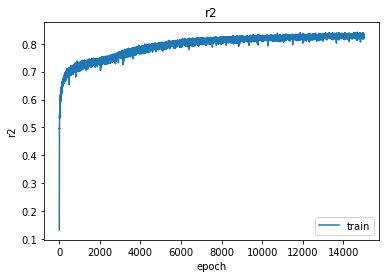

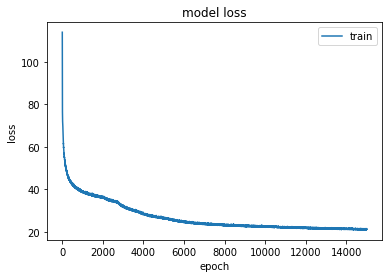

In [82]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['r2_keras'][5:])
plt.title('r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [1]:
#Plot actual vs predition for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(y_train,TestResults,'ro')

#Compute R-Square value for training set
TestR2Value = r2_score(y_train,TestResults)
print("Training Set R-Square=", TestR2Value)

#Plot actual vs predition for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(y_test,ValResults,'ro')

#Compute R-Square value for validation set
ValR2Value = r2_score(y_test,ValResults)
print("Validation Set R-Square=",ValR2Value)


NameError: name 'numpy' is not defined

In [8]:
model.save('filepath=/home/sir/Documents/mercedes/model', )

OSError: Unable to create file (unable to open file: name = 'filepath=/home/sir/Documents/mercedes/model', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [23]:
!pip3 install h5py


In [24]:
model.save('filepath=/home/sir/Documents/mercedes/')

ImportError: `save_model` requires h5py.